# Técnicas de regresión y agrupamiento
---
Práctica de laboratorio 4 - Convocatoria Extraordinaria

**Grupo A08**

**Fecha de entrega:** 20/06/2024, 23:59

---
---

El objetivo de esta práctica es obtener distintos modelos de clasificación a través de dos métodos diferentes: regresión y agrupamiento.

Para la realización de la práctica serán necesarias las siguientes librerías:

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage

El archivo de datos en el que se recoge toda la información para el desarrollo de la práctica es el archivo `wine_alcohol.csv`.

In [28]:
data = pd.read_csv('wine_alcohol.csv', sep = ';')
print(data.shape)
data.head()

(6497, 14)


,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,1,9.8
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,1,9.8
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,1,9.8
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1,9.4


Este dataset consta de 13 características, todas relacionadas con el vino.

*   **Fixed acidity**: Es la cantidad de ácidos fijos en el vino. Contribuye a la acidez total del vino y puede afectar a su sabor y estabilidad.

*   **Volatile acidity**: Es la cantidad de ácidos volátiles en el vino. En concentraciones altas, puede hacer que el vino tenga un sabor agrio o avinagrado.

*   **Citric acid**: Es el ácido cítrico presente en el vino. Contribuye al sabor y la frescura del vino.

*   **Residual sugar**: Es la cantidad de azúcar que queda en el vino después de la fermentación. Contribuye al sabor dulce del vino.

*   **Chlorides**: Es la cantidad de cloruros presentes en el vino. En concentraciones altas, puede afectar negativamente el sabor del vino.

*   **Free sulfur dioxide**: Es la cantidad de dióxido de azufre libre en el vino. Actúa como conservante y antioxidante.

*   **Total sulfur dioxide**: Es la cantidad total de dióxido de azufre (libre y combinado) en el vino. También actúa como conservante y antioxidante.

*   **Density**: Es la densidad del vino, que está relacionada con su contenido de alcohol y azúcar.

*   **pH**: Es una medida de la acidez o alcalinidad del vino. Un pH bajo indica acidez, mientras que un pH alto indica alcalinidad.

*   **Sulphates**: Es la cantidad de sulfatos presentes en el vino. Pueden contribuir al aroma y la estabilidad del vino.

*   **Quality**: Es una medida subjetiva de la calidad del vino donde valores más altos indican mejor calidad.

*   **Wine type**: Es el tipo de vino.

*   **Alcohol**: Es el contenido de alcohol en el vino. Contribuye al sabor y la fuerza del vino.

## Preprocesamiento de los datos

Para la limpieza del dataset se eliminan los posibles elementos duplicados y se comprueba que el conjunto no presente elementos nulos (`Nan`).

In [29]:
data = data.drop_duplicates()

print('NaN:', data.isna().sum().sum())

NaN: 0


Por otro lado, se elimina la columna `id` ya que no aporta información relevante para la realización de los ejercicios.

Para finalizar el tratamiento de los datos antes de comenzar los ejercicios, se estandarizan los valores de cada variable para evitar una variación grande entre registros.

In [30]:
data = data.drop(columns = 'id')

scaler = MinMaxScaler()

for col in data.columns:
  data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))

print(data.shape)
data.head()

(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.333333,0.0,0.202899
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.333333,0.0,0.260870
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.333333,0.0,0.260870
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.500000,0.0,0.260870
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.333333,0.0,0.202899


# Practica 1: Regresión

## Objetivo de la práctica
El objetivo de los dos primeros ejercicios de la práctica es la obtención de dos modelos de regresión lineal, uno simple y otro múltiple. Con estos modelos se quiere predecir el porcentaje de alcohol de un vino en función de ciertas características. En el archivo `wine_alcohol.csv` están recogidas todas las características de los vinos producidos en los últimos años.

## Ejercicio 1: Regresión Lineal Simple

#### Objetivo del ejercicio

En este primer ejercicio se quiere construir un modelo de regresión simple que permita predecir el grado de alcohol en función de otra de las características.

### Elección de atributos

Para seleccionar las dos variables con mayor relación con respecto al atributo objetivo se debe calcular la matriz de correlación del conjunto de datos. Para encontrar los valores más facilmente se representa esta matriz como un mapa de calor donde los valores más cercanos a 1 tendrán un color claro y los más cercanos a -1 estarán representados por colores oscuros.

<Axes: >

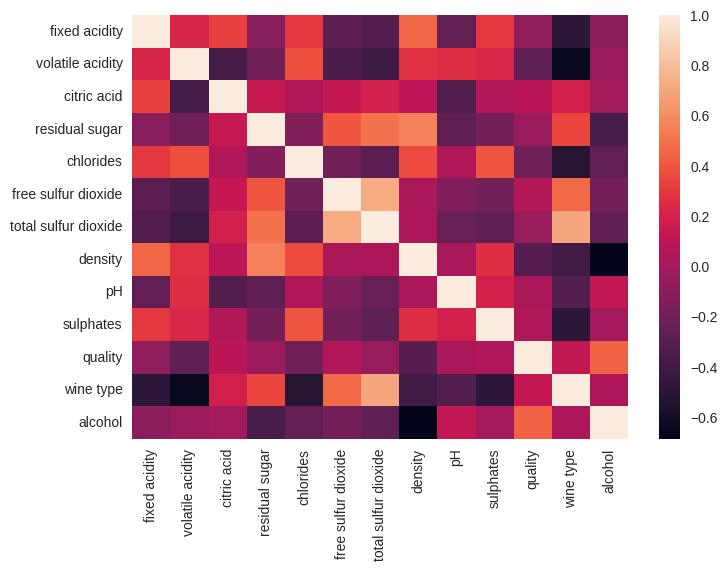

In [31]:
corr = data.corr()
sns.heatmap(corr)

Estudiando cada una de las variables del dataset se puede ver con cuáles tienen mejor relación y qué tipo, es decir, si es directa o inversa. Teniendo en cuenta que cuanto más cercano esté el valor absoluto de este número a `1`, mayor será la relación entre ellas. Algún ejemplo de la relación entre las distintas variables:

*   `citric acid` guarda una relación inversa del 37.79% con `volatile acidity`.

*   `alcohol` guarda una relación directa del 44.43% con `quality`.

*   `fixed acidity` guarda una relación inversa del 48.67% con `wine type`.

*   `sulphates` guarda una relación inversa del 48.72% con `wine type`.

*   `chlorides` guarda una relación inversa del 51.26% con `wine type`.

*   `residual sugar` guarda una relación directa del 55.25% con `density`.

*   `volatile acidity` guarda una relación inversa del 65.3% con `wine type`.

*   `density` guarda una relación inversa del 68.67% con `alcohol`.

*   `wine type` guarda una relación directa del 70.03% con `total sulfur dioxide`.

*   `free sulfur dioxide` guarda una relación directa del 72.09% con `total sulfur dioxide`.

*   `ph` guarda una relación inversa del 32.98% con `citric acid`.

Observando estos valores, la variable que destaca es `wine type` pues es la variable que guarda mejor relación con la mayoría de atributos: `fixed acidity`, `volatile acidity`, `chlorides`, `sulphates` y `total sulfur dioxide`.



Para poder ver con mayor claridad las variables más relacionadas con `alcohol`, se muestran únicamente los valores para esta variable.

In [32]:
alcohol = pd.DataFrame(abs(corr.loc['alcohol']).sort_values(ascending = False))
alcohol = alcohol.drop(index = 'alcohol')

for i in alcohol.index:
  if corr.loc[i, 'alcohol'] < 0:
    alcohol.loc[i] = -alcohol.loc[i]

alcohol

,alcohol
density,-0.686745
quality,0.444319
residual sugar,-0.359415
total sulfur dioxide,-0.265740
chlorides,-0.256916
free sulfur dioxide,-0.179838
pH,0.121248
fixed acidity,-0.095452
volatile acidity,-0.037640
wine type,0.032970


En este caso, los atributos con mayor relación con respecto a la variable `alcohol` son `density` y `quality` ya que son las dos características con mayor valor absoluto en su relación con `alcohol`.

Los valores de estas relaciones indican que, a mayor densidad el nivel de alcohol disminuye y, al contrario, a mayor calidad del vino aumentará también el contenido de alcohol.

### Modelo de regresión simple

Para la construcción del modelo de regresión lineal simple solo se necesita una variable de la que depende la variable objetivo. Por este motivo, se divide el conjunto de datos en dos nuevas variables (X e y). Como se han seleccionado dos características anteriormente, se escoge la variable `density` por ser la que mayor relación presenta con respecto a `alcohol`.

In [33]:
reg = LinearRegression()
simple = reg.fit(data[['density']], data[['alcohol']])
y_simp = simple.predict(data[['density']])

### Error del modelo

Para evaluar el error del modelo se calculan dos tipos de error: error cuadrático medio y error absoluto medio. El error cuadrático medio (MSE) se define como la media de los errores al cuadrado entre las predicciones de modelo y los valores reales. El error absoluto medio (MAE) indica la media de los valores absolutos de los errores entre las predicciones del modelo y los valores reales. Cuanto más cercanos a `0` estos valores, mejor será el modelo.

Además, se calcula el coeficiente de determinación (R^2) que es una medida de cuánta variabilidad en el atributo objetivo es explicada por el modelo. Si este valor es cercano a `1` se puede decir que se ha obtenido un buen modelo.

In [34]:
mse_simp = mean_squared_error(data[['alcohol']], y_simp)
mae_simp = mean_absolute_error(data[['alcohol']], y_simp)
r2_simp = r2_score(data[['alcohol']], y_simp)

print('MSE:', mse_simp)
print('MAE:', mae_simp)
print('R^2:', r2_simp)

MSE: 0.015785303258036898
MAE: 0.0972005592063234
R^2: 0.4716192742013736


Para este modelo, se obtienen valores bastante bajos en los errores. El error cuadrático medio del 1.57% indica que las predicciones del modelo están desviadas de los valores reales en 0.0157 unidades cuadradas. El valor de 9.72% correspondiente al error absoluto medio indica que las predicciones del modelo están desviadas en 0.097 unidades de los valores reales.

Un R^2 de 0.47 significa que, aproximadamente, el 47.16% de la variabilidad en el contenido de alcohol se puede explicar con la densidad. Este valor no está muy cercano al 1, lo que indica que el modelo explica una parte significativa de la variabilidad en el atributo objetivo, con un margen de mejora para el ajuste del modelo.

## Ejercicio 2: Regresión Lineal Múltiple

#### Objetivo del ejercicio

En este segundo ejercicio se busca mejorar los resultados del modelo anterior empleando más de una característica en el modelo de regresión.

### División de los datos

Para la elección del mejor modelo de regresión múltiple se divide el conjunto de datos para obtener un conjunto de entrenamiento y otro de test. De esta forma, se podrán valorar los distintos modelos que se generen y seleccionar el que presente un error menor.

In [35]:
X = data.drop(columns = 'alcohol')
y = data[['alcohol']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

print('Entrenamiento:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Entrenamiento: (5197, 12) (5197, 1)
Test: (1300, 12) (1300, 1)


### Modelo de regresión múltiple

La selección de los atributos que se utilizarán en el modelo de regresión múltiple se seleccionarán por un proceso de aprendizaje iterativo. Para ello, primero se debe crear la lista de todas las posibles combinaciones de características.

Se crean 4 bucles `for` anidados para establecer cada una de las posiciones de la lista de cuatro elementos. Para cada bucle se genera una nueva lista que no contenga los valores anteriores. De esta forma, se evita generar listas con los mismos elementos.

In [36]:
col = list(X.columns.sort_values())
var = []

for a in col:
  a_col = col[col.index(a)+1:]

  for b in a_col:
    b_col = a_col[a_col.index(b)+1:]

    for c in b_col:
      c_col = b_col[b_col.index(c)+1:]

      for d in c_col:
        var.append(list(np.sort([a, b, c, d])))

Una vez creada las listas de los posibles atributos, se calcula el error de los modelos generados y se selecciona el de menor error. Seleccionando de las variables `X_train` y `X_test` los atributos correspondientes.

In [37]:
reg = LinearRegression()
MSE = 1

for i in var:
  X_train_i, X_test_i = X_train[i], X_test[i]

  y_pred = reg.fit(X_train_i, y_train).predict(X_test_i)

  mse = mean_squared_error(y_test, y_pred)

  if mse < MSE:
    MSE = mse
    atributos = i

print('Variables:', atributos, '\n MSE:', MSE)

Variables: ['density', 'fixed acidity', 'residual sugar', 'wine type'] 
 MSE: 0.007624164629620804


El mejor modelo que se puede obtener al aplicar la regresión lineal múltiple con cuatro atributos es el que utiliza las variables `density`, `fixed acidity`, `residual sugar` y `wine type`. Este modelo obtendría un error del 36% al evaluarlo sobre el conjunto de test.

In [38]:
reg = LinearRegression()
multiple = reg.fit(data[atributos], data[['alcohol']])
y_mult = multiple.predict(data[atributos])

### Error del modelo

Al igual que para el modelo simple, se calculan el error cuadrático medio, el error absoluto medio y el coeficiente de determinación para evaluar el modelo.

In [39]:
mse_mult = mean_squared_error(y, y_mult)
mae_mult = mean_absolute_error(y, y_mult)
r2_mult = r2_score(y, y_mult)

print('MSE:', mse_mult)
print('MAE:', mae_mult)
print('R^2:', r2_mult)

MSE: 0.008399331720131433
MAE: 0.06719375896974214
R^2: 0.7188495578476204


Para el modelo de regresión múltiple se obtienen errores bajos. El error cuadrático medio del 0.83% indica que las predicciones están desviadas en 0.0083 unidades cuadradas de los valores reales. El valor del error absoluto medio indica que la desviación de las predicciones es de 0.067 unidades frente a los valores reales.

El valor de R^2 es de 0.72, esto significa que más del 70% de la información del volumen de alcohol se puede explicar con la densidad, la acided fija, el azúcar restante y el tipo de vino. Al ser un valor valor cercano a 1, se puede decir que este sería un buen modelo de predicción para el contenido de alcohol de un vino.

### Intervalos de confianza

Antes de calcular los intervalos de confianza para los coeficientes se tiene que añadir una constante al conjunto X de forma que quede representada la variable independiente. Después, se ajusta el modelo mediante los mínimos cuadrados ordinarios y de ahí, se obtienen los intervalos.

Al requerirse una confianza del 75%, el valor de `alpha` será 0.25. Esto se debe a que `alpha` se calcula como `1 - confianza`.

In [40]:
X = sm.add_constant(data[atributos])

model_ols = sm.OLS(data[['alcohol']], X).fit()

ci = model_ols.conf_int(alpha = 0.25)
ci

,0,1
const,0.909079,0.924472
density,-4.587546,-4.495418
fixed acidity,0.588446,0.620067
residual sugar,1.728895,1.796632
wine type,-0.260742,-0.250991


En la tabla se representan los intervalos de confianza para cada una de las variables del modelo, siendo `const` el intercepto. A la izquierda se representa el inicio del intervalo (columna `0`) y a la derecha el final del intervalo (columna `1`).

Es decir, los resultados obtenidos están aceptados con un 75% de confianza dentro de los intervalos:

* `const`: (0.91, 0.92)
* `density`:	(-4.59, -4.50)
* `fixed acidity`: (0.59	0.62)
* `residual sugar`:	(1.72	1.80)
* `wine type`:	(-0.26	-0.25)

### Comparación entre modelos

Se comparan los resultados de los dos modelos anteriores.

In [41]:
error = pd.DataFrame({'Regresión Simple': [mse_simp, mae_simp, r2_simp],
                      'Regresión Múltiple': [mse_mult, mae_mult, r2_mult]},
                     index = ['MSE', 'MSE', 'R^2'])
error

,Regresión Simple,Regresión Múltiple
MSE,0.015785,0.008399
MSE,0.097201,0.067194
R^2,0.471619,0.718850


Como se puede observar en la tabla, al emplear más variables para predecir el valor del atributo objetivo, se consigue un mejor modelo. El valor de ambos errores es bastante menor en el modelo múltiple frente a los valores del modelo simple. Además, el valor del coeficiente de determinación es mucho más cercano a 1, indicando que este modelo es mejor que el anterior.

Esto se debe a que al aumentar el número de variables se pierde menos información respecto a la variable objetivo. Por tanto, los resultados obtenidos son más precisos y se adaptan mejor a los valores reales.

# Práctica 2: Agrupamiento

## Objetivo de la práctica

El objetivo de los siguientes ejercicios es la aplicación de dos algoritmos de agrupamiento para comprobar la calidad de los vinos. Los datos para realizar estos ejercicios se encuentran también en el archivo `wine_alcohol.csv`.

## Preprocesamiento de los datos

Teniendo en cuenta que el dataset ya ha sido correctamente preparado, se puede proseguir con la elección de las variables apropiadas para establecer el agrupamiento de los datos en función de las variables `quality` y `alcohol` según el grado de correlación.

## Ejercicio 3

### Objetivo del ejercicio
En este ejercicio se emplea el algoritmo K-Means para encontrar el número de grupos, según la calidad de los vinos, que mejor se ajusta a los datos presentados.

### Algoritmo K-Means

Para poder aplicar el algoritmo K-Means se debe establecer primero el número de clústeres (k) necesarios para generar un buen modelo. Para ello, se utilizará el método del codo que muestra de manera visual el número óptimo de clústeres. Este número se optimiza mediante la suma de cuadrados de las distancias entre puntos.

En este caso, se probará un rango de k entre 1 y 15 para encontrar el que mejor se adapta a los datos.

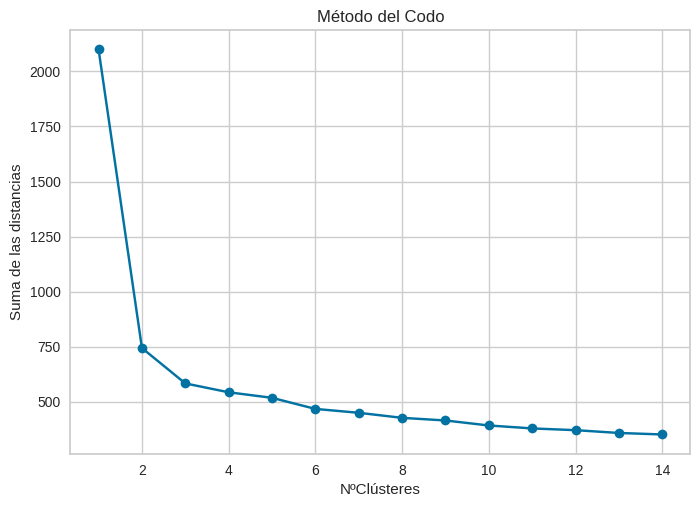

In [42]:
suma = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters = k, random_state = 123, n_init = 'auto')
    kmeans.fit(data)
    suma.append(kmeans.inertia_)

plt.plot(range(1, 15), suma, 'o-')
plt.xlabel('NºClústeres')
plt.ylabel('Suma de las distancias')
plt.title('Método del Codo')
plt.show()

El número óptimo de clústeres será 3 ya que es en ese punto donde se produce la acodación de la gráfica. Para confirmar esta observación, se emplea el método de la silueta para 2, 3 y 4 clústeres.

Este método mide la distancia entre los grupos, tomando valores entre -1 y 1. Aquí, el valor 1 indica que los puntos están muy cerca del clúster al que pertenecen, siendo el valor -1, por el contrario, el que indica la cercanía a los otros clústeres.

SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=2, n_init=10,
                                      random_state=42))

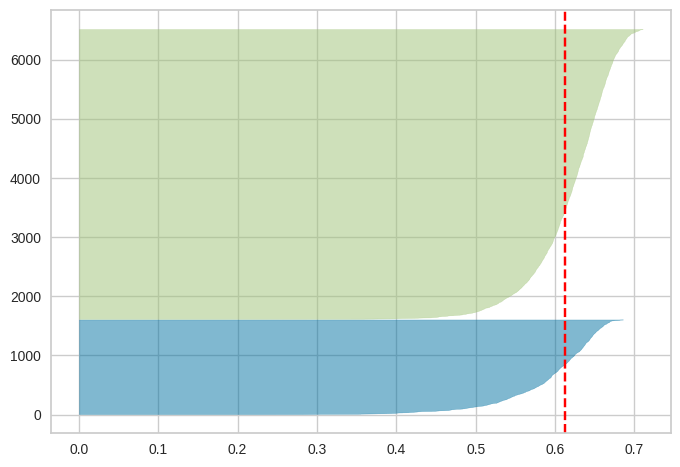

In [43]:
km = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10,
            max_iter = 100, random_state = 42)

visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick')
visualizer.fit(data)

SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=3, n_init=10,
                                      random_state=42))

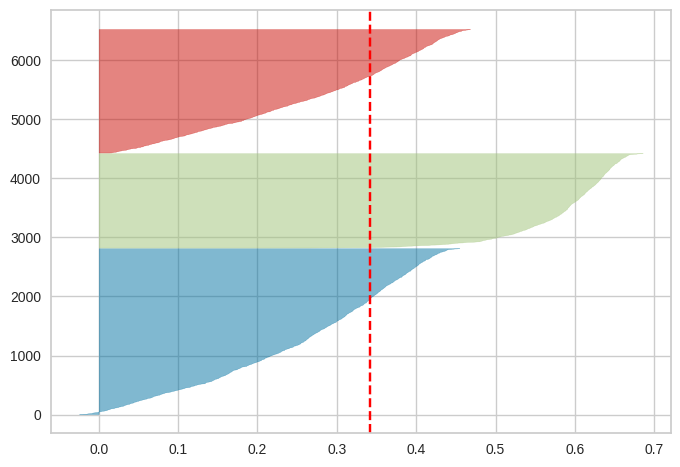

In [44]:
km = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10,
            max_iter = 100, random_state = 42)

visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick')
visualizer.fit(data)

SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=4, n_init=10,
                                      random_state=42))

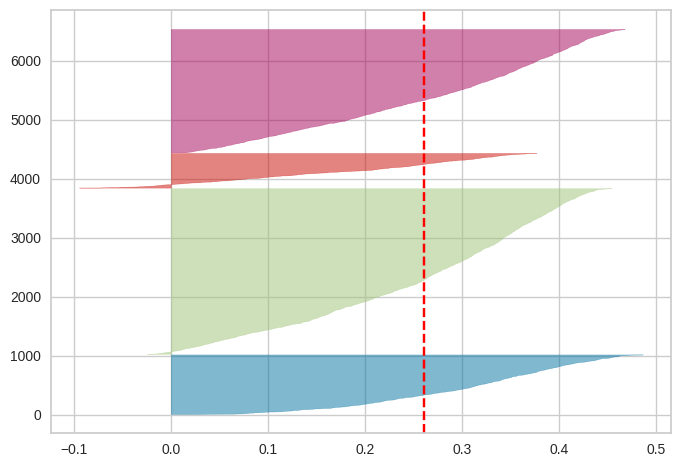

In [45]:
km = KMeans(n_clusters = 4, init = 'k-means++', n_init = 10,
            max_iter = 100, random_state = 42)

visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick')
visualizer.fit(data)

Todos los clústeres están por encima de la media, indicada por la linea de puntos, para cada una de las pruebas. Debido a esto, este criterio no es indicativo del número óptimo de clústeres.

Sin embargo, evaluando el comportamiento de tres grupos se puede ver que el tamaño entre ellos es mucho más uniforme que para dos o cuatro clústeres. Por tanto, la observación original se mantiene y se establece que `k = 3` es el número óptimo de clústeres para este problema y se puede proceder a crear el modelo. También se calculan los centroides y las distancias a los centroides para su posterior utilización.

In [46]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10,
                max_iter = 100, random_state = 42)

kmeans.fit(data)

centroides = kmeans.cluster_centers_
distancias = kmeans.transform(data)

Para analizar los datos, se añade la etiqueta del clúster al dataset y se grafica el comportamiento de los grupos en relación a las características `alcohol` y `quality`.

In [47]:
data['cluster'] = kmeans.labels_

ncluster = data[['cluster', 'alcohol']].groupby('cluster').count()
ncluster

,alcohol
cluster,
0,2807
1,1599
2,2091


Como se puede ver en el recuento anterior, los tres grupos tienen un número parecido de elementos. Esto confirma las observaciones iniciales del diagrama de siluetas.

### Preguntas planteadas

#### ¿Existe algún tipo de similitud entre los grupos obtenidos y los valores de la variable quality del dataset?

Para calcular la relación entre la calidad del vino y el grupo en el que se ha agrupado cada registro se vuelve a calcular la matriz de correlación, añadiendo esta vez la clase `cluster`. Se centra la atención únicamente en la relación entre las variables `quality` y `cluster`.

In [48]:
corr = data.corr()
print('Relación `cluster` - `quality`:', corr.loc['cluster', 'quality'])

Relación `cluster` - `quality`: 0.4645912318837132


La relación entre estos atributos es una relación directa del 46.46%. Esto quiere decir que la calidad indica en un 45% la información necesaria para clasificar los vinos.

#### ¿Cómo se diferencian los clústeres entre sí?

La diferencia entre los clústeres es la distancia que hay entre ellos. Es decir, la distancia entre los centroides de cada grupo.

In [49]:
dist = pairwise_distances(kmeans.cluster_centers_)

dist = pd.DataFrame({'Distancia': [dist[0, 1], dist[0, 2], dist[1, 2]]},
                    index = ['C0 --- C1', 'C0 --- C2', 'C1 --- C2'])

dist

,Distancia
C0 --- C1,1.074974
C0 --- C2,0.365965
C1 --- C2,1.076302


Las distancias entre los clústeres C0, C1 y C1, C2 indican una mayr separación que entre los clústeres C0, C2. Por tanto, la diferencia entre elementos de clústeres distintos será mayor entre el grupo C0, C1 y C1, C2 que entre loss registros de C0 con respecto a C0.

## Ejercicio 4

### Objetivo del ejercicio
En este último ejercicio se quiere aplicar un algoritmo de agrupamiento jerárquico para clasificar los vinos en base a sus componentes, calidad y nivel de alcohol.

### Ejemplos más representativos


Dados los clústeres formados en el ejercicio anterior, se seleccionan los 10 ejemplos más representativos de cada grupo. Estos ejemplos serán, por clúster, los registros más cercanos al centroide. Como las distancias ya se han calculado, solo queda seleccionar las 10 con valores más bajos para cada clúster.

In [50]:
ejs = []

for i in range(3):
  idx = np.argsort(distancias[:, i])[:10]
  ejs.append(data.iloc[idx])

ejs = pd.DataFrame(np.concatenate(ejs), columns = data.columns)
ejs.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,wine type,alcohol,cluster
0,0.280992,0.153333,0.210843,0.101227,0.061462,0.152778,0.396313,0.161751,0.325581,0.174157,0.333333,1.0,0.246377,0.0
1,0.280992,0.153333,0.210843,0.101227,0.061462,0.152778,0.396313,0.161751,0.325581,0.174157,0.333333,1.0,0.246377,0.0
2,0.264463,0.173333,0.234940,0.096626,0.094684,0.145833,0.359447,0.163871,0.302326,0.174157,0.333333,1.0,0.217391,0.0
3,0.239669,0.153333,0.253012,0.088957,0.079734,0.083333,0.327189,0.161751,0.341085,0.129213,0.333333,1.0,0.231884,0.0
4,0.256198,0.140000,0.246988,0.110429,0.061462,0.177083,0.380184,0.159244,0.310078,0.162921,0.333333,1.0,0.231884,0.0


### Algoritmo de agrupamiento jerárquico

Una vez obtenidos los ejemplares más representativos de cada grupo, se aplica un algoritmo de agrupamiento jerárquico calculando la distancia por el método Hamming.

In [51]:
hierarchy = AgglomerativeClustering(n_clusters = 3, affinity = 'hamming', linkage = 'complete')
hierarchy.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='hamming', linkage='complete', n_clusters=3)

 Una vez realizada la clasificación, se asignan las etiquetas correspondientes según el clúster en el que queden agrupados los elementos. Se repite el recuento de elementos por clúster.

In [52]:
data['cluster'] = hierarchy.labels_
data.head()

ncluster = data[['cluster', 'alcohol']].groupby('cluster').count()
ncluster

,alcohol
cluster,
0,2749
1,1876
2,1872


Al aplicar este algoritmo los clústeres resultantes presentan también un número parecido de elementos.

### Dendograma

Para poder analizar los resultados de esta clasificación se grafican los clústeres en un dendograma.

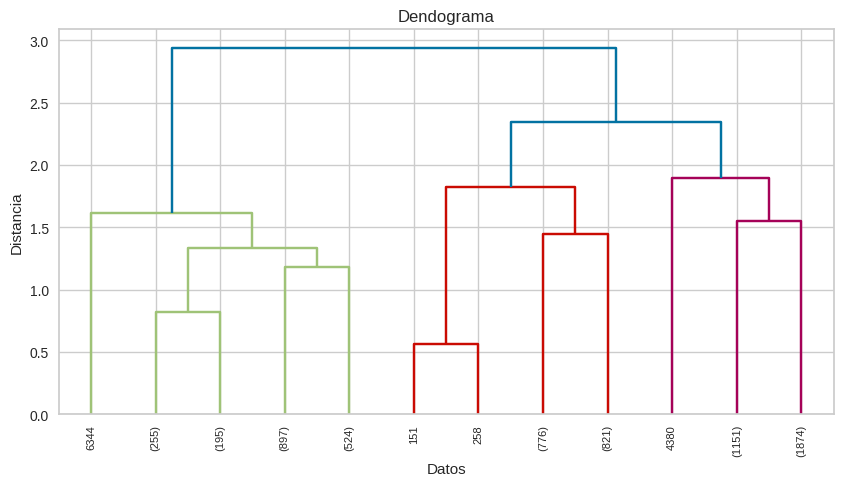

In [53]:
matriz = linkage(data, method = 'complete')

plt.figure(figsize = (10, 5))

dendrogram(matriz, truncate_mode = 'level', p = 3, leaf_rotation = 90.,
           leaf_font_size = 8., color_threshold = None)
plt.title('Dendograma')
plt.xlabel('Datos')
plt.ylabel('Distancia')
plt.show()

La división de los grupos en este diagrama viene marcado por el color que señala las distancias entre registros (verde, rojo y morado). Los elementos del primer grupo están menos distanciados que en los otros, lo que se puede ver por comparando las distancias que unen los componentes más distanciados dentro del clúster. Además, los clústeres rojo y morado tienen más parecidos, al estar menos distanciados, que comparados con el clúster verde.